In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("df_group.csv")
df_all_1 = pd.read_csv("smooth.csv")
df_all_2 = pd.read_csv("ml_lineal.csv")

In [21]:
x_min = 2020
x_max = 2025


In [22]:
countries = df_all_1['countryiso3code'].unique().tolist()


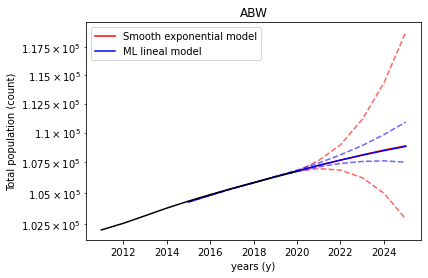

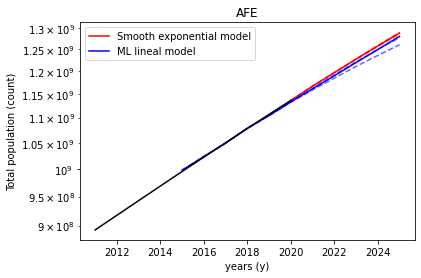

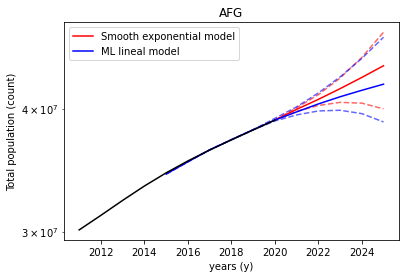

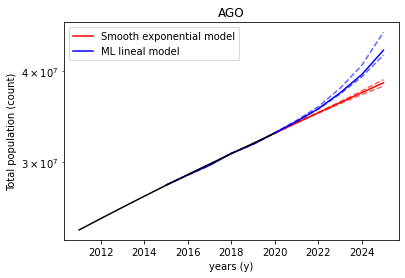

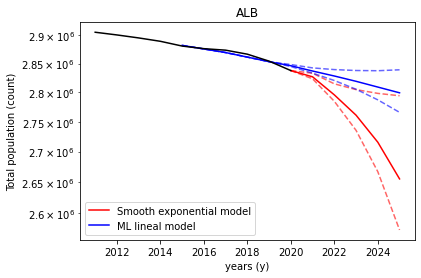

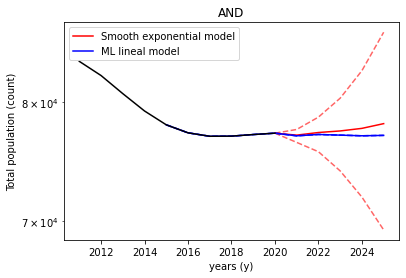

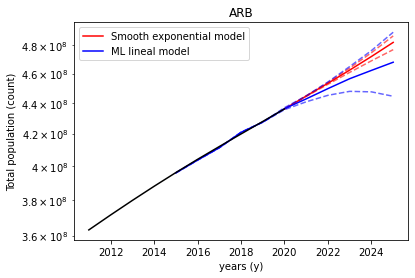

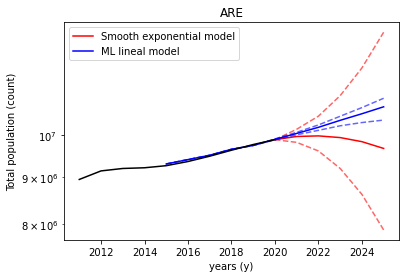

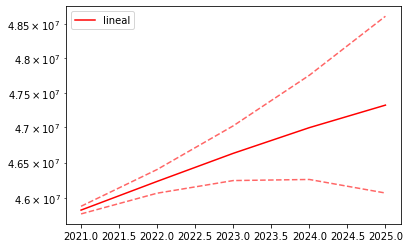

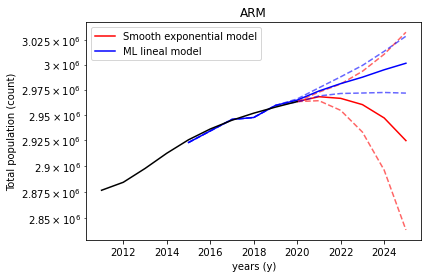

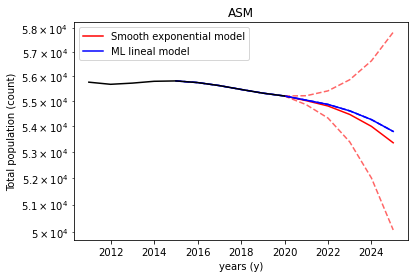

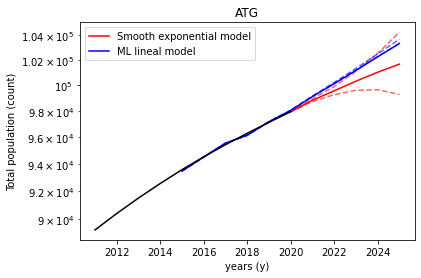

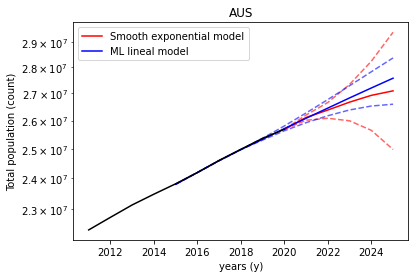

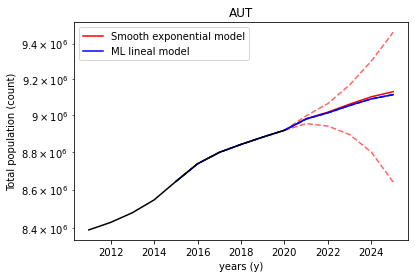

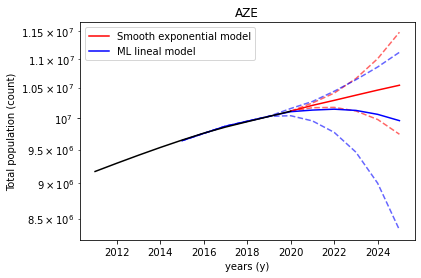

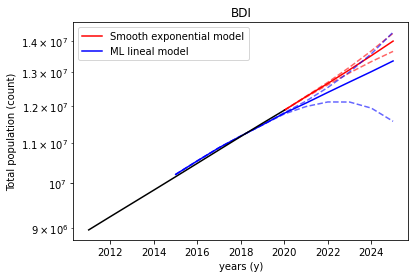

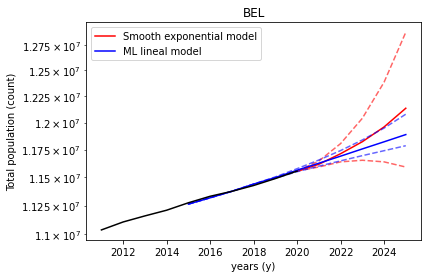

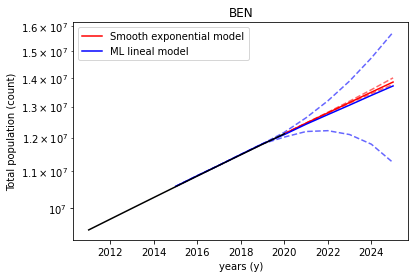

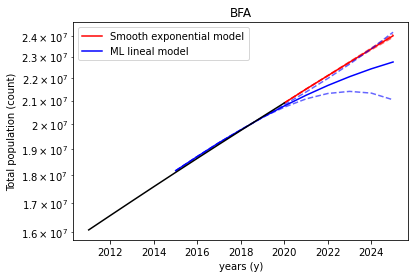

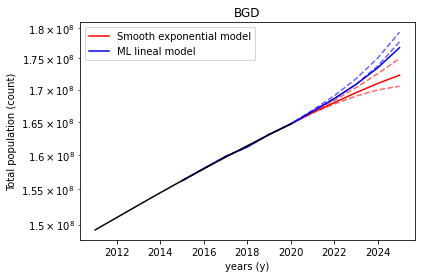

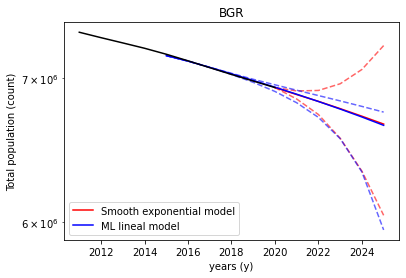

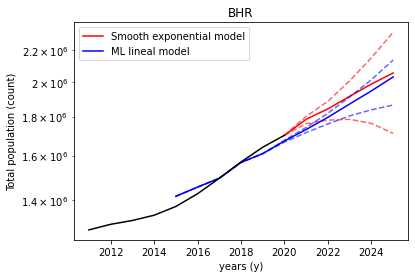

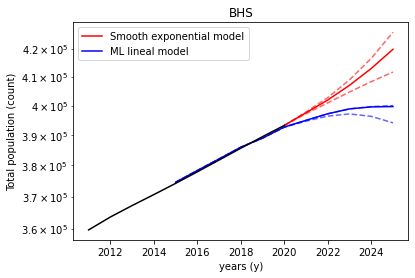

KeyboardInterrupt: 

In [23]:
diff_porcentual = []

for country in countries:
    try:

        x = df_all_1[ (df_all_1['date']>x_min) & (df_all_1['countryiso3code'] == country) ]['date']
        
        y_down = df[ (df['date']>2010) & (df['countryiso3code'] == country) ]['value']
        x_down = df[ (df['date']>2010) & (df['countryiso3code'] == country) ]['date']
        
        x_1 = df_all_1[(df_all_1['date']>=2020)& (df_all_1['countryiso3code'] == country)]['date']
        y_1 = df_all_1[(df_all_1['date']>=2020)& (df_all_1['countryiso3code'] == country)]['value']
        y_1_min = df_all_1[(df_all_1['date']>=2020)& (df_all_1['countryiso3code'] == country)]['value_min']
        y_1_max = df_all_1[(df_all_1['date']>=2020)& (df_all_1['countryiso3code'] == country)]['value_max']
        
        x_2 = df_all_2[(df_all_2['date']>=2015) & (df_all_2['countryiso3code'] == country)]['date']
        y_2 = df_all_2[(df_all_2['date']>=2015) & (df_all_2['countryiso3code'] == country)]['value_KNeighbors']
        y_2_min = df_all_2[(df_all_2['date']>=2015) & (df_all_2['countryiso3code'] == country)]['value_KNeighbors_min']
        y_2_max = df_all_2[(df_all_2['date']>=2015) & (df_all_2['countryiso3code'] == country)]['value_KNeighbors_max']
        
        
        
        plt.plot(x_1, y_1, color='red', label = 'Smooth exponential model')
        plt.plot(x_1, y_1_min, color='red', linestyle='dashed', alpha = 0.6)
        plt.plot(x_1, y_1_max, color='red', linestyle='dashed', alpha = 0.6)
        
        plt.plot(x_2, y_2, label='ML lineal model', color='blue')
        plt.plot(x_2, y_2_min, color='blue', linestyle='dashed', alpha = 0.6)
        plt.plot(x_2, y_2_max, color='blue', linestyle='dashed', alpha = 0.6)
        
        plt.plot(x_down, y_down, color='black')
        plt.title(country)
        plt.xlabel('years (y)')
        plt.ylabel('Total population (count)')
        plt.legend()
        
        plt.yscale("log")
        plt.show()
        diff_porcentual.append((y_2.values[-1]-y_1.values[-2])*100/y_2.values[-1])
    except: 
        x = df_all_1[ (df_all_1['date']>x_min) & (df_all_1['countryiso3code'] == country) ]['date']
        
        y_1 = df_all_1[(df_all_1['date']>x_min)& (df_all_1['countryiso3code'] == country)]['value']
        y_1_min = df_all_1[(df_all_1['date']>x_min)& (df_all_1['countryiso3code'] == country)]['value_min']
        y_1_max = df_all_1[(df_all_1['date']>x_min)& (df_all_1['countryiso3code'] == country)]['value_max']
        
        plt.plot(x, y_1, color='red', label = 'lineal')
        plt.plot(x, y_1_min, color='red', linestyle='dashed', alpha = 0.6)
        plt.plot(x, y_1_max, color='red', linestyle='dashed', alpha = 0.6)
        plt.yscale("log")
        plt.legend()
        
        plt.show()

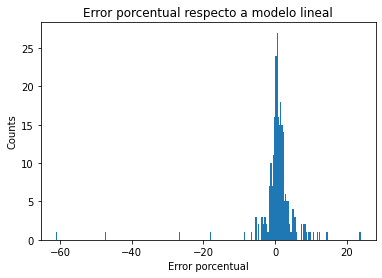

In [29]:
plt.hist(diff_porcentual, bins=250)
plt.title('Error porcentual respecto a modelo lineal')
plt.xlabel('Error porcentual')
plt.ylabel('Counts')
plt.show()